In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,BatchNormalization,Input,Bidirectional,Conv1D,MaxPooling1D,Flatten
from tensorflow.keras import regularizers
import tensorflow as tf
import numpy as np

In [26]:
df = []
for i in range(0,5):
    df.append(pd.read_csv(f'history_log_{i}.csv'))

In [27]:
model = Sequential([
        LSTM(50, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), input_shape=(256,3), return_sequences = False ),
        Dropout(0.2),
        Dense(2, activation = 'softmax') 
        ])

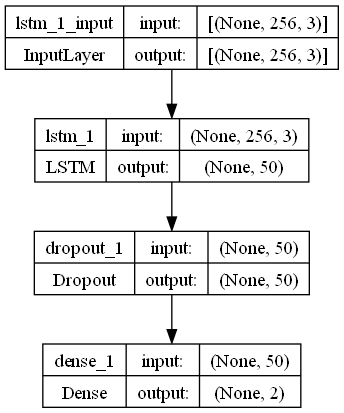

In [28]:
tf.keras.utils.plot_model(model, show_shapes=True)

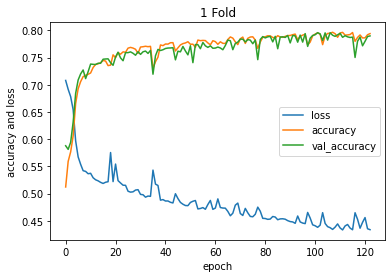

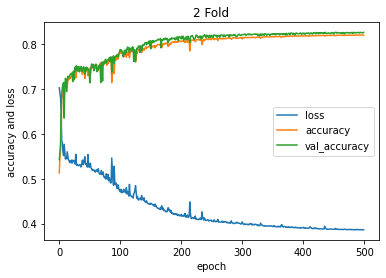

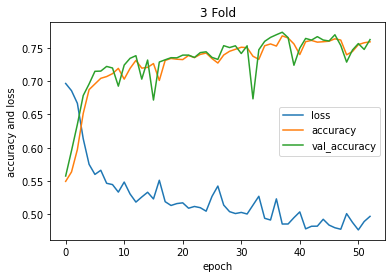

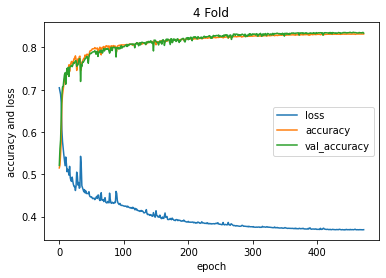

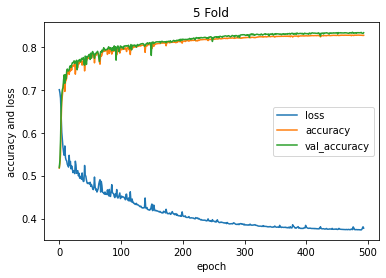

In [29]:
for i in range(len(df)):
    plot = df[i][:].reset_index()[['loss','accuracy','val_accuracy']].plot(title = f'{i+1} Fold',xlabel = 'epoch',ylabel = 'accuracy and loss')
    fig = plot.get_figure()
    fig.savefig(f'{i}_fold.png')    

In [30]:
from IPython.display import display
for i in range(len(df)):
    display(df[i][df[i]['epoch']==0])

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.51205,0.70788,0.587833,0.692741


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.512848,0.702658,0.542644,0.693906


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.549571,0.696398,0.557593,0.689091


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.514997,0.704621,0.520937,0.694833


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.517478,0.700163,0.518901,0.695553


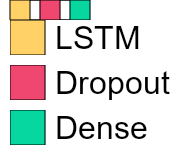

In [31]:
from PIL import ImageFont
import visualkeras
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font,draw_volume=False)  # font is optional!

In [32]:
table = []
for i in range(len(df)):
    display(df[i][df[i]['val_accuracy'] == df[i]['val_accuracy'].max()][:1])
    table.append(df[i][df[i]['val_accuracy'] == df[i]['val_accuracy'].max()][:1])
table = pd.concat(table)

,epoch,accuracy,loss,val_accuracy,val_loss
101,101,0.795267,0.437937,0.79568,0.434599


,epoch,accuracy,loss,val_accuracy,val_loss
436,436,0.818199,0.39113,0.826571,0.378928


,epoch,accuracy,loss,val_accuracy,val_loss
37,37,0.76779,0.485594,0.773238,0.487138


,epoch,accuracy,loss,val_accuracy,val_loss
456,456,0.831538,0.368817,0.835987,0.357706


,epoch,accuracy,loss,val_accuracy,val_loss
475,475,0.827053,0.374226,0.833975,0.363782


In [33]:
import pickle

# open a file, where you stored the pickled data
file = open('scores', 'rb')
# dump information to that file
scores = pickle.load(file)
# close the file
file.close()

# open a file, where you stored the pickled data
file = open('evaluations', 'rb')
# dump information to that file
evaluations = pickle.load(file)
# close the file
file.close()


In [34]:
scores = np.asarray(scores).T

In [35]:
scores

array([[0.8081792 , 0.8081792 , 0.8081792 ],
       [0.78098214, 0.780982  , 0.7809822 ],
       [0.7915331 , 0.7915331 , 0.7915331 ],
       [0.79252094, 0.79252094, 0.79252094],
       [0.81772745, 0.8177274 , 0.8177274 ]], dtype=float32)

In [36]:
df3 = pd.DataFrame(scores,columns = ['f1','recalls','precisions'])

In [37]:
df3

,f1,recalls,precisions
0,0.808179,0.808179,0.808179
1,0.780982,0.780982,0.780982
2,0.791533,0.791533,0.791533
3,0.792521,0.792521,0.792521
4,0.817727,0.817727,0.817727


In [38]:
np.asarray(evaluations)[:,1]

array([0.8081792 , 0.78098202, 0.79153311, 0.79252094, 0.81772739])

In [39]:
df3

,f1,recalls,precisions
0,0.808179,0.808179,0.808179
1,0.780982,0.780982,0.780982
2,0.791533,0.791533,0.791533
3,0.792521,0.792521,0.792521
4,0.817727,0.817727,0.817727


In [40]:
df2 = table[['accuracy','val_accuracy','epoch']].reset_index()
df2 = pd.concat([df2,df3],axis = 1)
df2['test_accuracy'] = np.asarray(evaluations)[:,1]


In [41]:
s = pd.DataFrame([df2.sum()])/5

In [42]:
df2 = pd.concat([df2,s])

In [43]:
df2 = ((df2*10000)//1)/10000

In [44]:
df2.columns

Index(['index', 'accuracy', 'val_accuracy', 'epoch', 'f1', 'recalls',
       'precisions', 'test_accuracy'],
      dtype='object')

In [45]:
df2 = df2[['accuracy', 'val_accuracy','test_accuracy','epoch','recalls','precisions','f1']]

In [46]:
df2

,accuracy,val_accuracy,test_accuracy,epoch,recalls,precisions,f1
0,0.7952,0.7956,0.8081,101.0,0.8081,0.8081,0.8081
1,0.8181,0.8265,0.7809,436.0,0.7809,0.7809,0.7809
2,0.7677,0.7732,0.7915,37.0,0.7915,0.7915,0.7915
3,0.8315,0.8359,0.7925,456.0,0.7925,0.7925,0.7925
4,0.8270,0.8339,0.8177,475.0,0.8177,0.8177,0.8177
0,0.8079,0.8130,0.7981,301.0,0.7981,0.7981,0.7981


In [47]:
df2.to_csv('table.csv')

In [48]:
df2

,accuracy,val_accuracy,test_accuracy,epoch,recalls,precisions,f1
0,0.7952,0.7956,0.8081,101.0,0.8081,0.8081,0.8081
1,0.8181,0.8265,0.7809,436.0,0.7809,0.7809,0.7809
2,0.7677,0.7732,0.7915,37.0,0.7915,0.7915,0.7915
3,0.8315,0.8359,0.7925,456.0,0.7925,0.7925,0.7925
4,0.8270,0.8339,0.8177,475.0,0.8177,0.8177,0.8177
0,0.8079,0.8130,0.7981,301.0,0.7981,0.7981,0.7981
